In [1]:
from CollectMaPSAs import *
import ROOT
import cPickle
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/00


In [2]:
plt.rc('font', size=22, weight='bold', family='sans-serif')
plt.rc('axes', titlesize=22)#, labelsize=18)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=22)
plt.rc('figure', titlesize=22)

In [3]:
#name = "round2tot-HPK"
#vendor = "Vendor 1"

name = "round2abcde-QuikPak"
vendor = "Vendor 2"

In [4]:
f1 = name+".txt"
outdir = name

In [5]:
mapsa_names = []
mapsas = []
    
print('Reading MaPSA names from ' + f1)
with open(f1) as f:
    reader = csv.reader(f)
    mapsa_names = [row[0] for row in reader]

for m in mapsa_names:

    # Read MaPSA object from file, if available
    fname = 'pickles/'+m+'.pkl'
    if os.path.isfile(fname):
        print("Loading MaPSA " + m)
        mapsa = cPickle.load(open(fname,'rb'))
    else: # Create it
        mapsa = MaPSA(m)

    mapsas += [mapsa]

Reading MaPSA names from round2abcde-QuikPak.txt
Loading MaPSA QuikPak_PS-p-P1_kapton
Loading MaPSA QuikPak_PS-p-P1_4_kapton
Loading MaPSA QuikPak_PS-p-P2
Loading MaPSA QuikPak_PS-p-P2_4_kapton
Loading MaPSA QP_N2XM21
Loading MaPSA QP_N6T902N2XM21
Loading MaPSA QP_no10
Loading MaPSA QP_no12
Loading MaPSA QP_no8
Loading MaPSA QP_N6T902
Loading MaPSA QP_N6T902b
Loading MaPSA QP_no11
Loading MaPSA QP_no13
Loading MaPSA QP_no9
Loading MaPSA QP_no15
Loading MaPSA QP_no16
Loading MaPSA QP_no14
Loading MaPSA QP_no17p2
Loading MaPSA QP_no18p2
Loading MaPSA QP_no20p1
Loading MaPSA QP_no14p2
Loading MaPSA QP_no18p1
Loading MaPSA QP_no3p16
Loading MaPSA QP_no24p1
Loading MaPSA QP_no22p2
Loading MaPSA QP_no24p2
Loading MaPSA QP_no20p1b
Loading MaPSA QP_no24p1b
Loading MaPSA QP_no17p2b
Loading MaPSA QP_no20p2
Loading MaPSA QP_no20p2b
Loading MaPSA QP_no22p2b
Loading MaPSA QP_no17p2c
Loading MaPSA QP_no20p1c
Loading MaPSA QP_no22p1
Loading MaPSA QP_no24p1c
Loading MaPSA QP_no27p1


In [6]:
# Pixel plots
print("Processing " + str(len(mapsas)) + " MaPSAs for pixel plots")

badchips = []
badchips += ["HPK36_1-1","HPK36_1-11","HPK32_2-2","HPK32_2-3","HPK32_2-14"]
badchips += ["QP_no18p2-14","QP_no27p1-13","QP_no14-2","QP_no14-3","QP_no27p1c-1"]

allpix = pd.DataFrame([])
allpix_bad = pd.DataFrame([])

for m in mapsas:
    for chip in m.mpa_chips:
        if chip.mapsa_name+"-"+str(chip.index) in badchips:
            allpix_bad = allpix_bad.append(chip.pixels)
        else:
            allpix = allpix.append(chip.pixels)

if len(allpix_bad) == 0:
    allpix_bad = pd.DataFrame(columns=allpix.columns)

npix = len(allpix["pa"])
logmax = npix*50

Processing 37 MaPSAs for pixel plots


In [7]:
cols = ["CAL_Mean_DER","CAL_Mean_pretrim_DER","CAL_RMS_DER","CAL_RMS_pretrim_DER",
        "THR_Mean_DER","THR_Mean_pretrim_DER","THR_RMS_DER","THR_RMS_pretrim_DER",
        "Bump_Mean_DER","Bump_RMS_DER"]
names = {}
names["CAL_Mean_DER"] = "CAL mean"
names["CAL_Mean_pretrim_DER"] = "CAL mean (before trimming)"
names["CAL_RMS_DER"] = "CAL noise"
names["CAL_RMS_pretrim_DER"] = "THR noise (before trimming)"
names["THR_Mean_DER"] = "THR mean"
names["THR_Mean_pretrim_DER"] = "THR mean (before trimming)"
names["THR_RMS_DER"] = "THR noise"
names["THR_RMS_pretrim_DER"] = "THR noise (before trimming)"
names["Bump_Mean_DER"] = "Bump test mean at -2V"
names["Bump_RMS_DER"] = "Bump test noise at -2V"

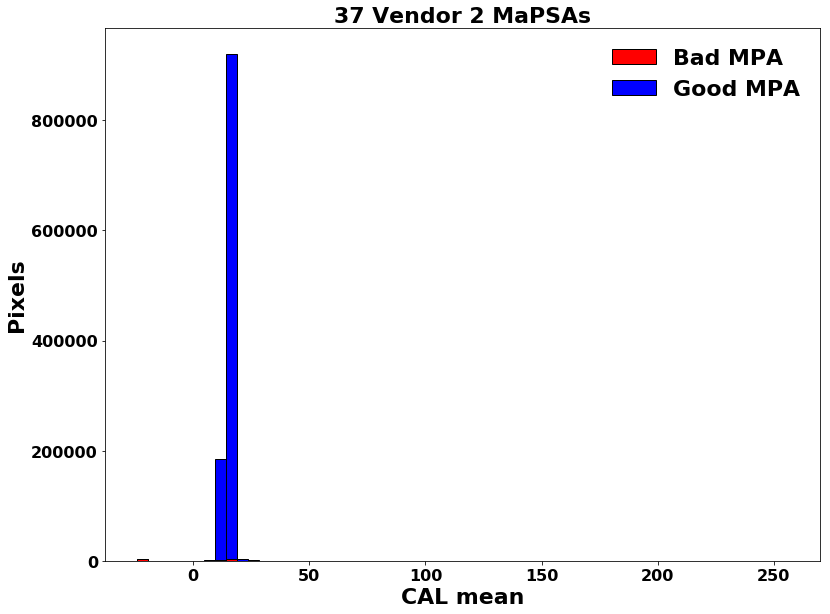

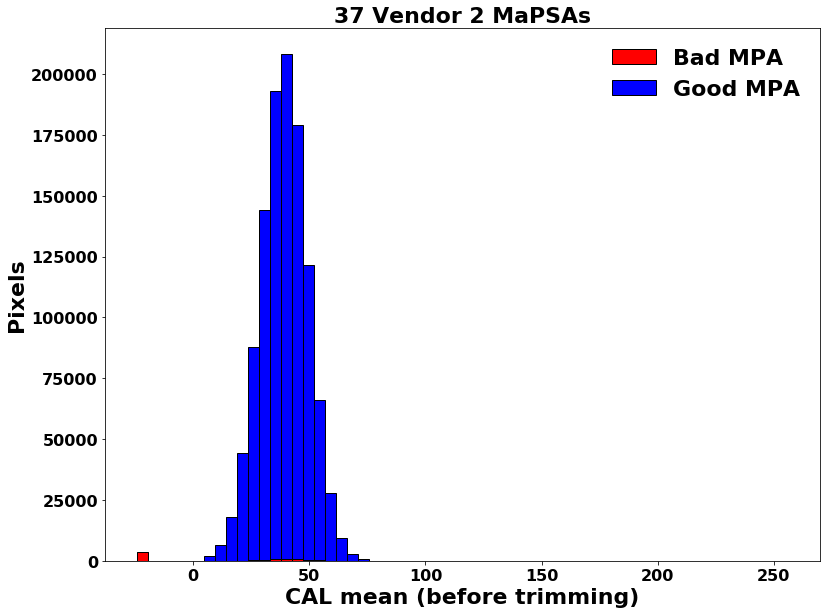

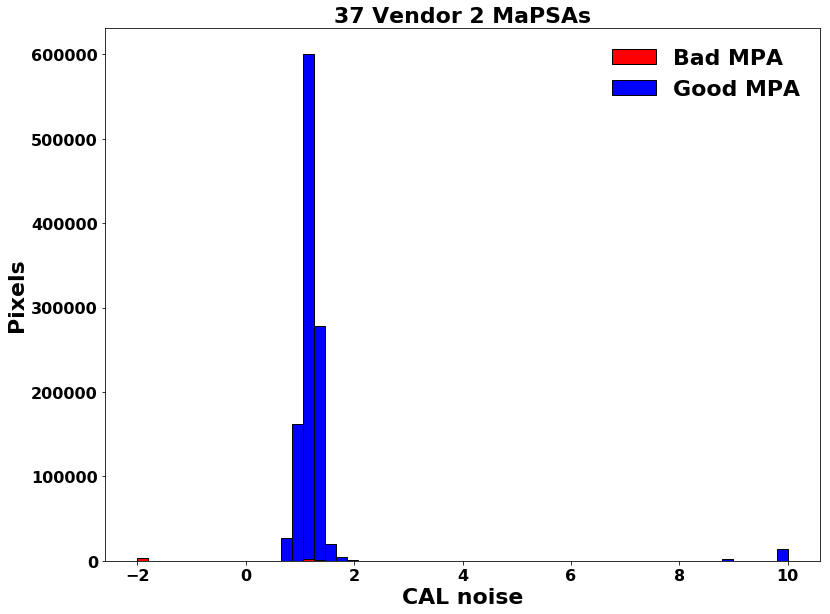

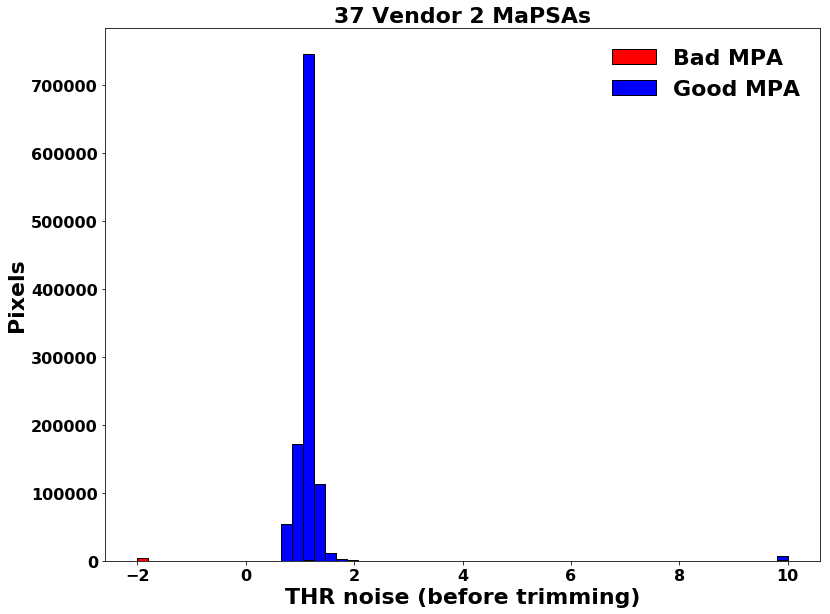

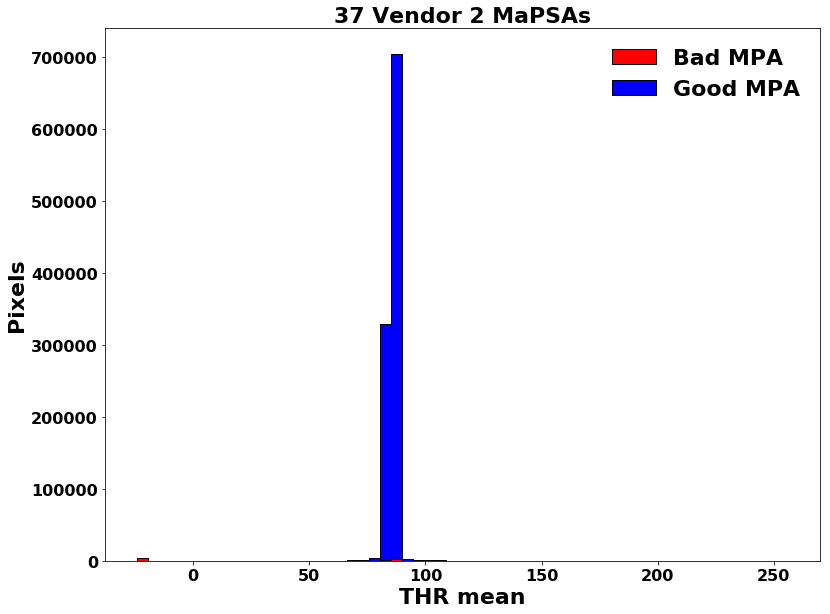

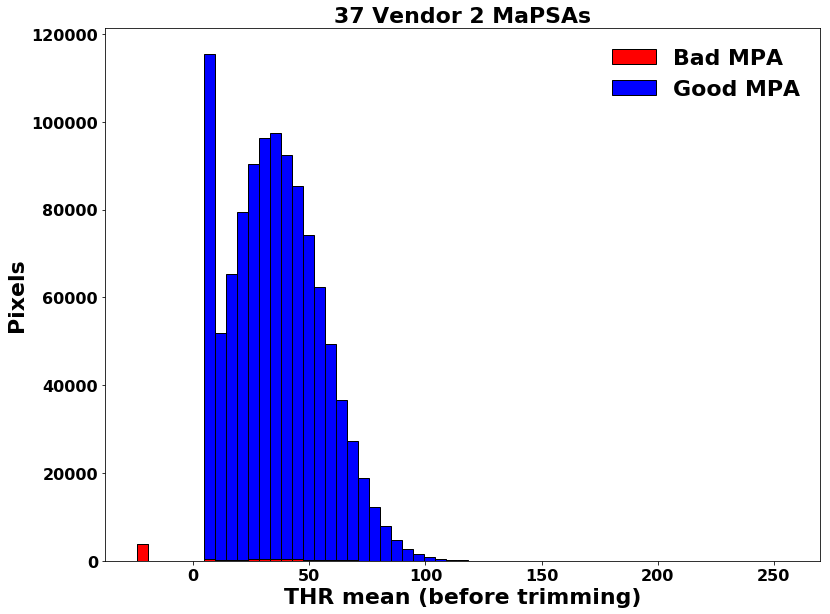

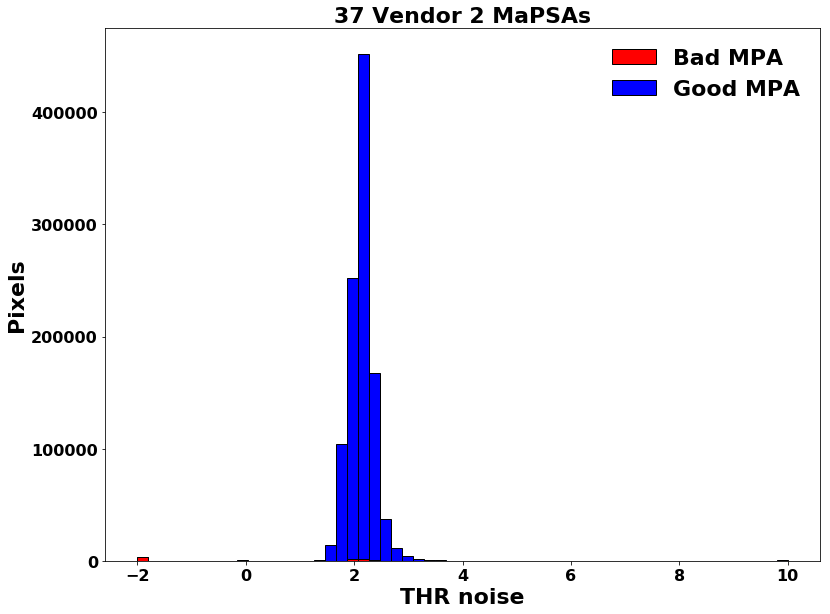

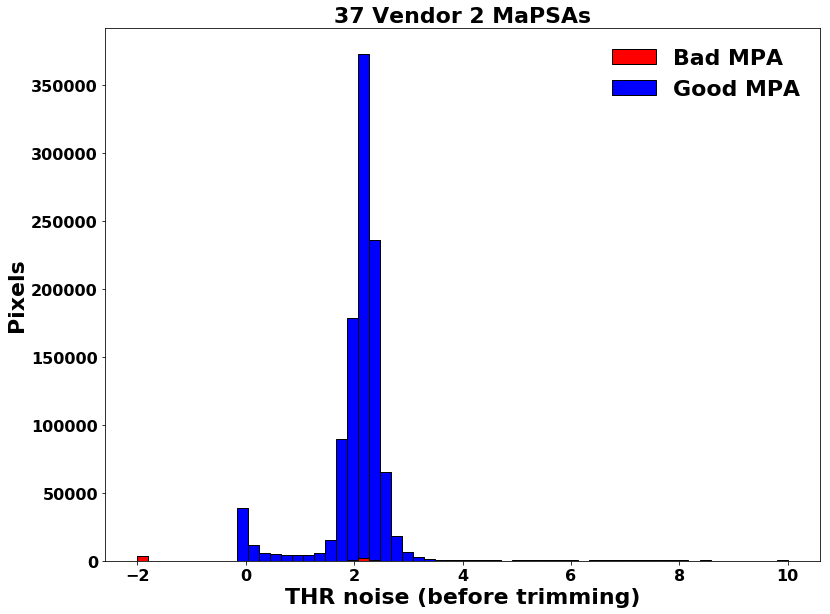

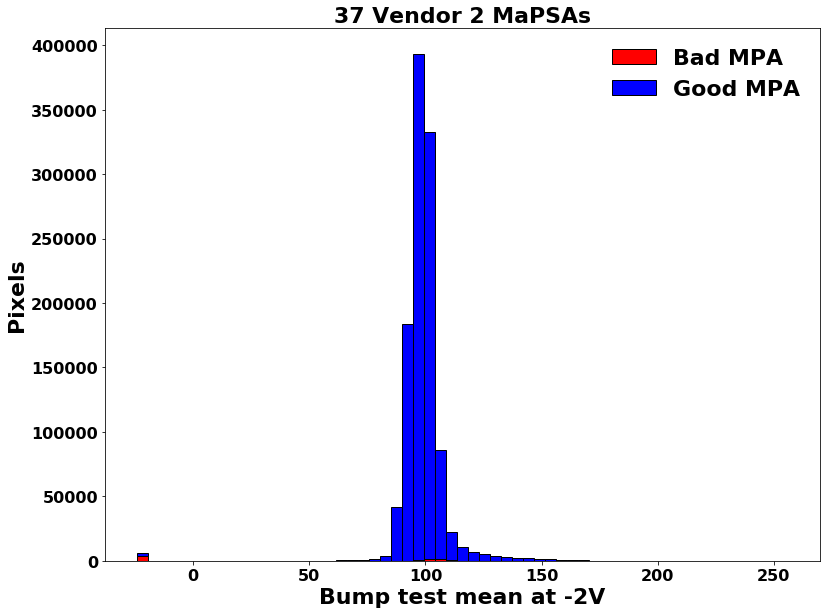

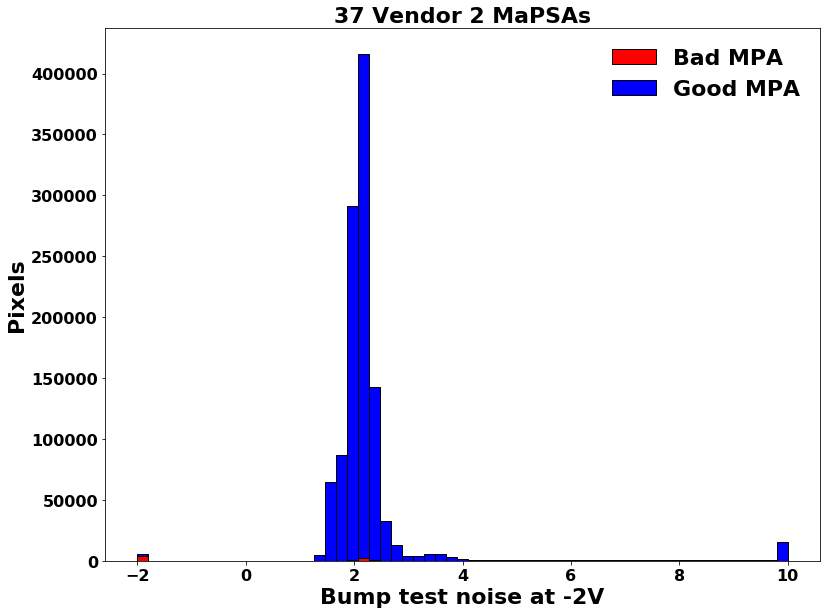

In [8]:
for c in cols:
    fig1 = plt.figure(figsize=(12,9))
    
    minval = -24
    maxval = 256
    nbins = 60
    if "RMS" in c:
        minval = -2
        maxval = 10
        
    bins=np.linspace(minval,maxval,nbins)
        
    arr1 = np.clip(allpix_bad[c],minval,maxval)
    arr2 = np.clip(allpix[c],minval,maxval)
    
    plt.hist(np.array([arr1,arr2]),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
    plt.xlabel(names[c],fontweight='bold')
    plt.ylabel("Pixels",fontweight='bold')
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    plt.legend(["Bad MPA","Good MPA"],frameon=False)
    plt.tight_layout()
    plt.show()

    fig1.savefig(outdir+"/"+c+".png",bbox_inches='tight')
    fig1.savefig(outdir+"/"+c+".pdf",bbox_inches='tight')

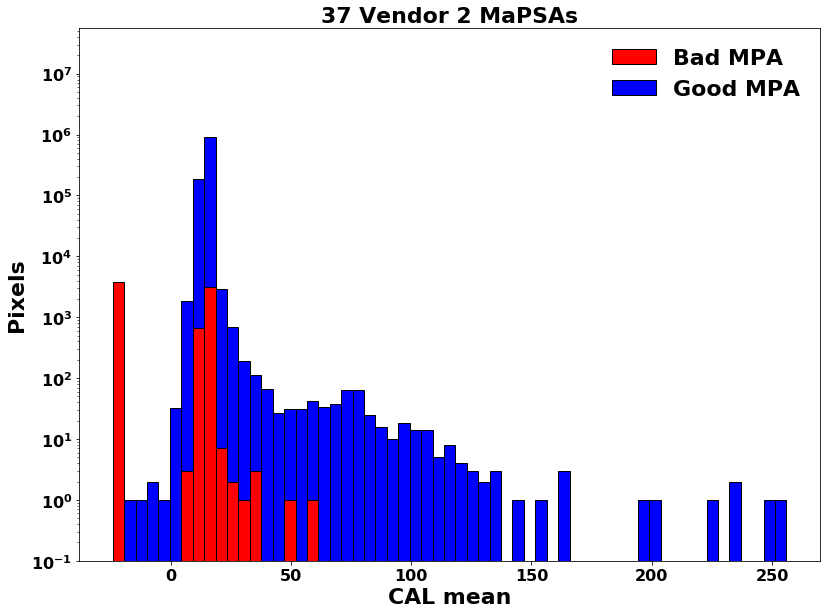

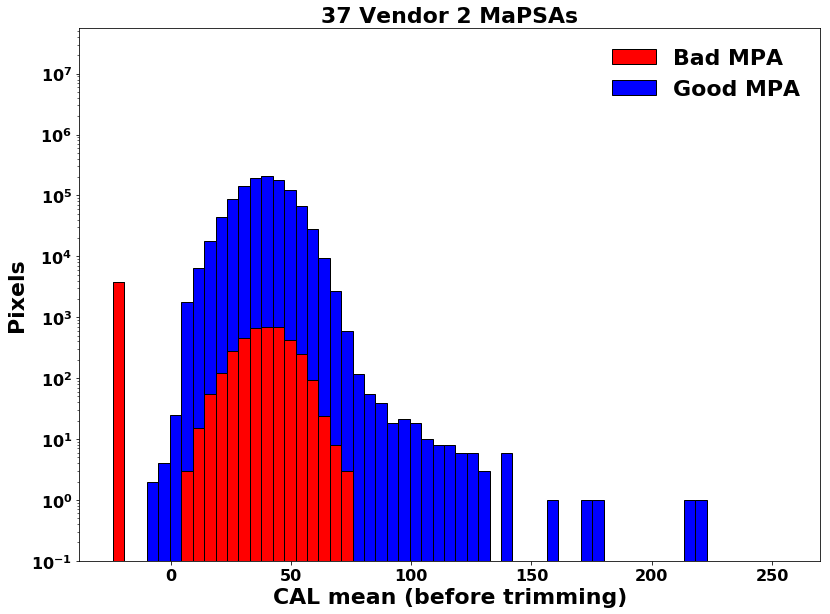

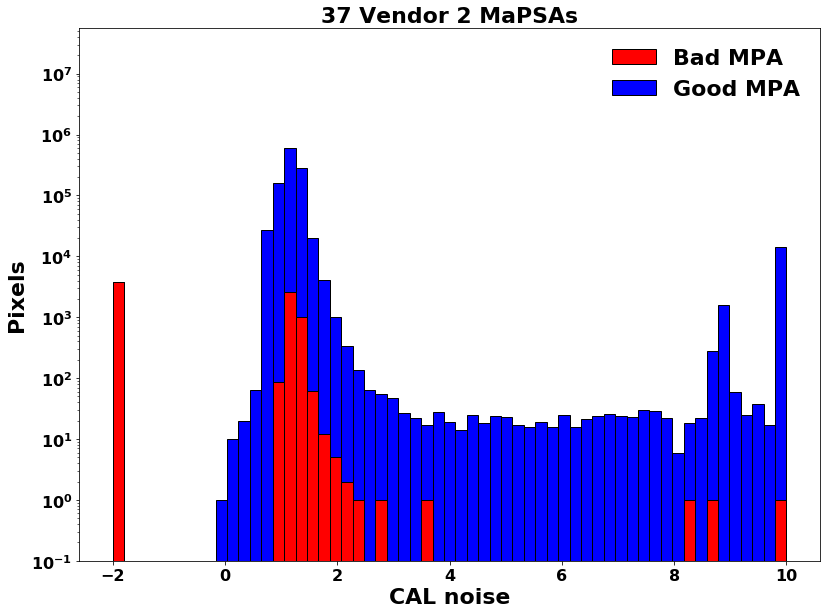

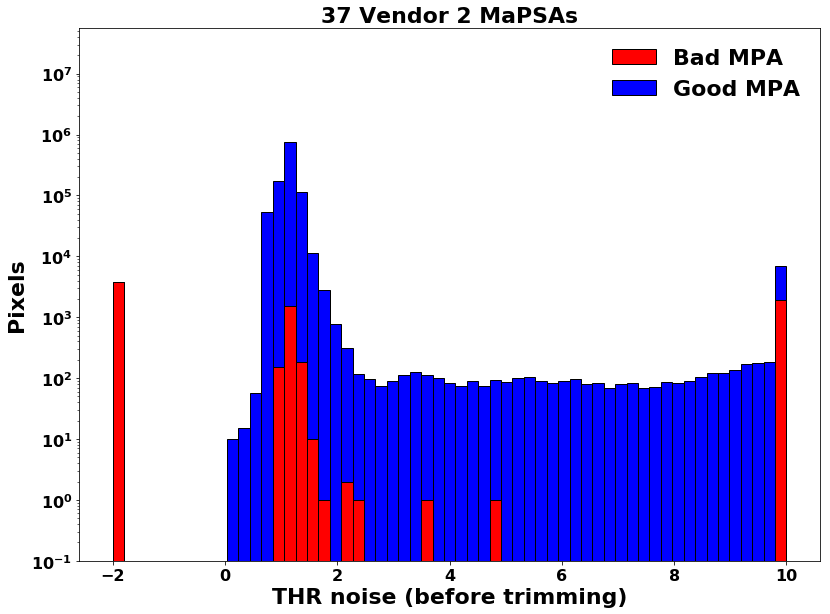

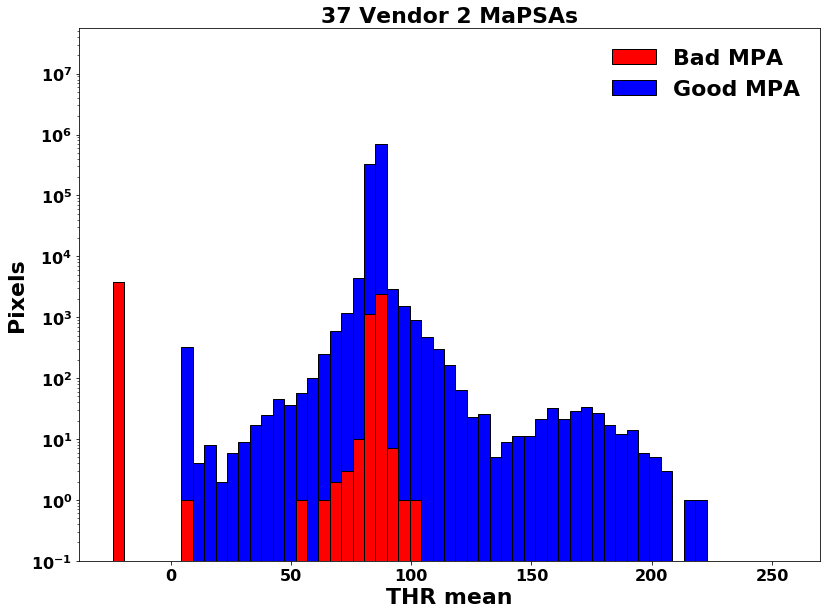

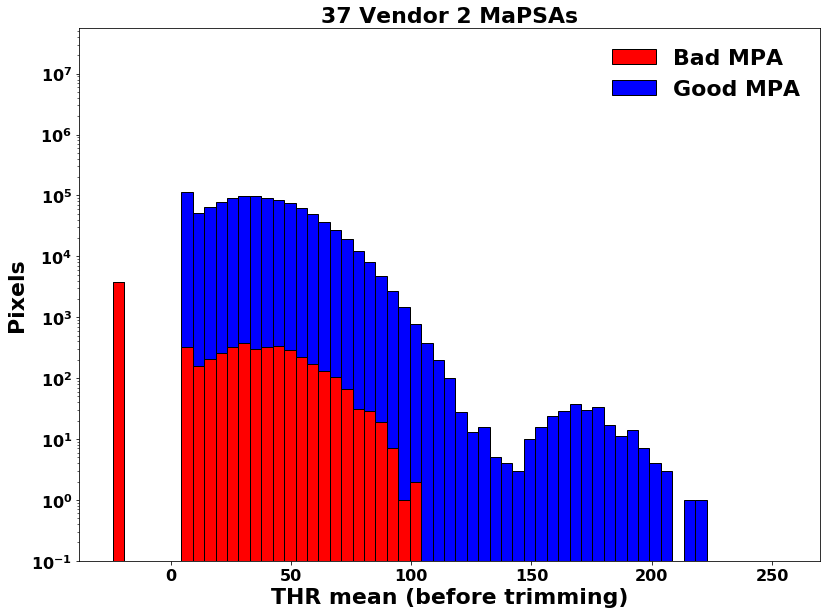

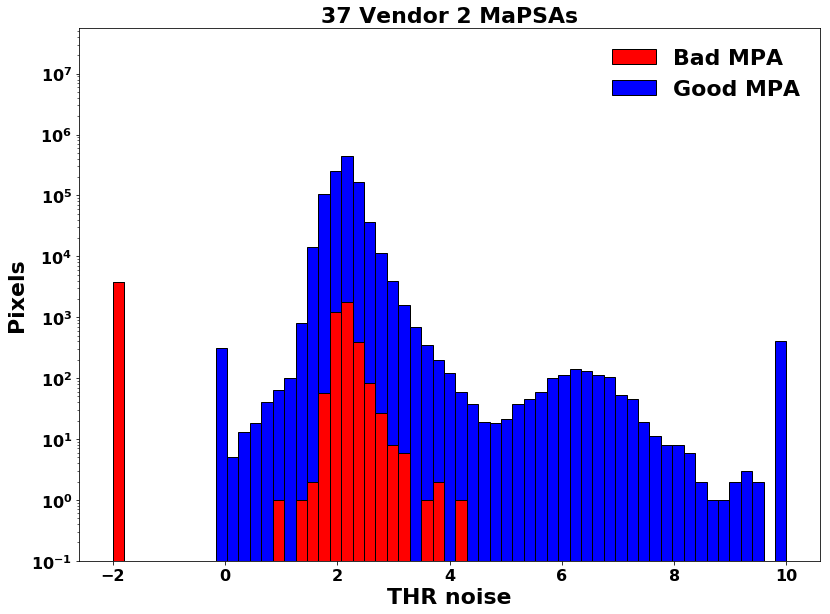

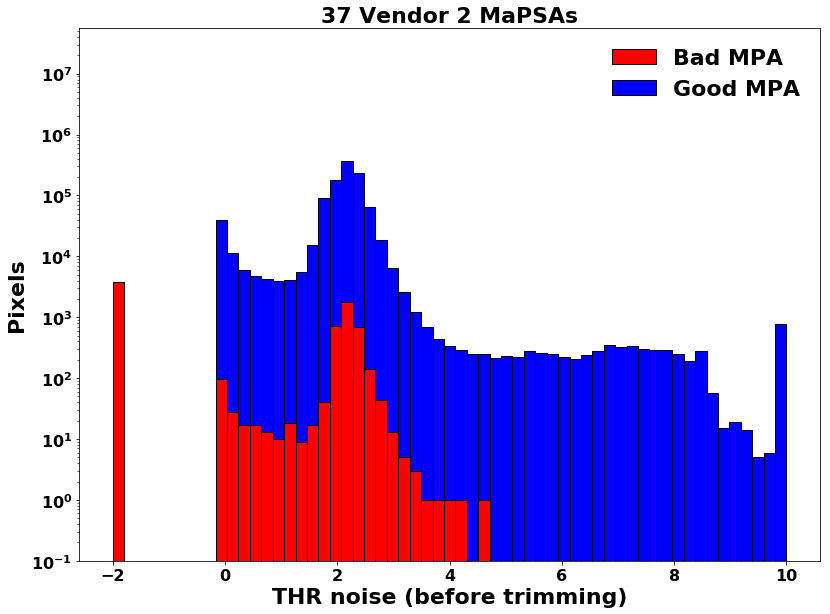

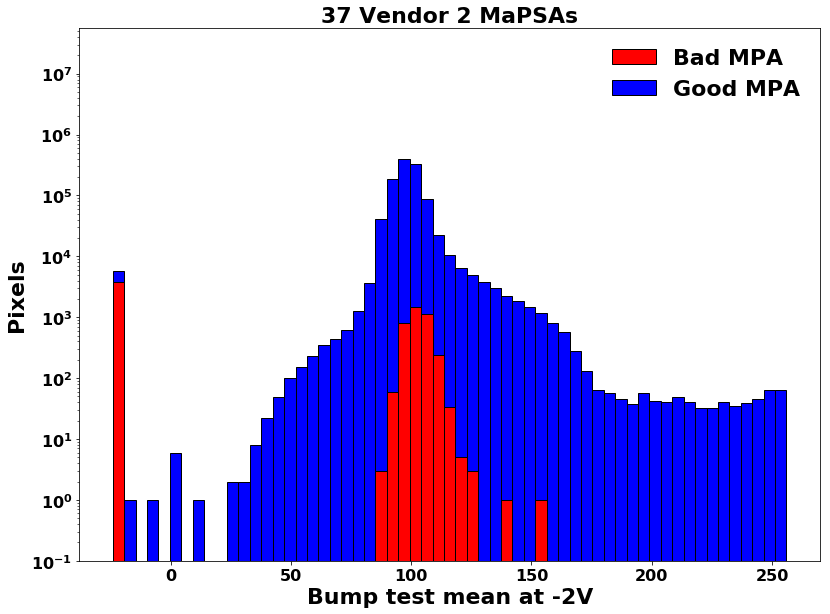

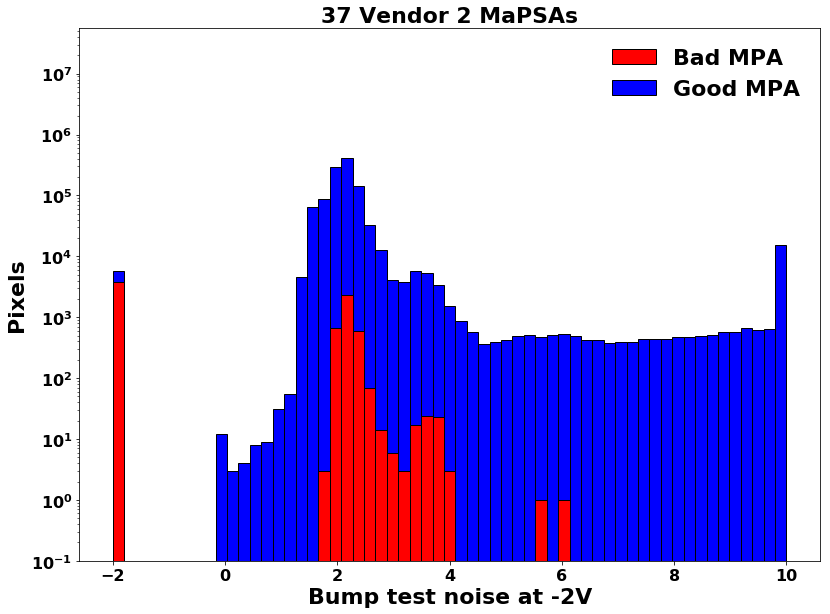

In [9]:
for c in cols:
    fig1 = plt.figure(figsize=(12,9))

    minval = -24
    maxval = 256
    nbins = 60
    if "RMS" in c:
        minval = -2
        maxval = 10
        
    bins=np.linspace(minval,maxval,nbins)
        
    arr1 = np.clip(allpix_bad[c],minval,maxval)
    arr2 = np.clip(allpix[c],minval,maxval)
    
    plt.hist(np.array([arr1,arr2]),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
    plt.xlabel(names[c],fontweight='bold')
    plt.ylabel("Pixels",fontweight='bold')
    plt.yscale('log')
    plt.ylim([0.1,logmax])
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    plt.legend(["Bad MPA","Good MPA"],frameon=False)
    plt.tight_layout()
    plt.show()

    fig1.savefig(outdir+"/"+c+"_log.png",bbox_inches='tight')
    fig1.savefig(outdir+"/"+c+"_log.pdf",bbox_inches='tight')

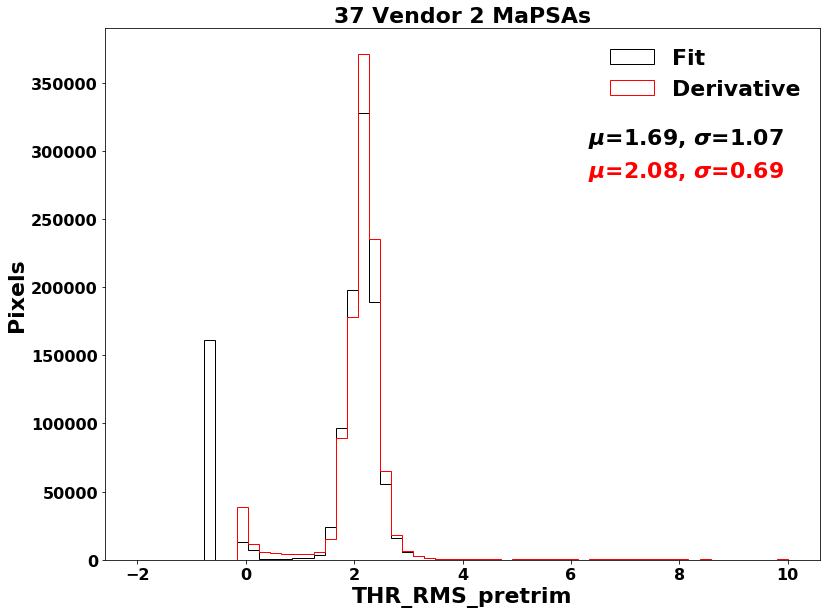

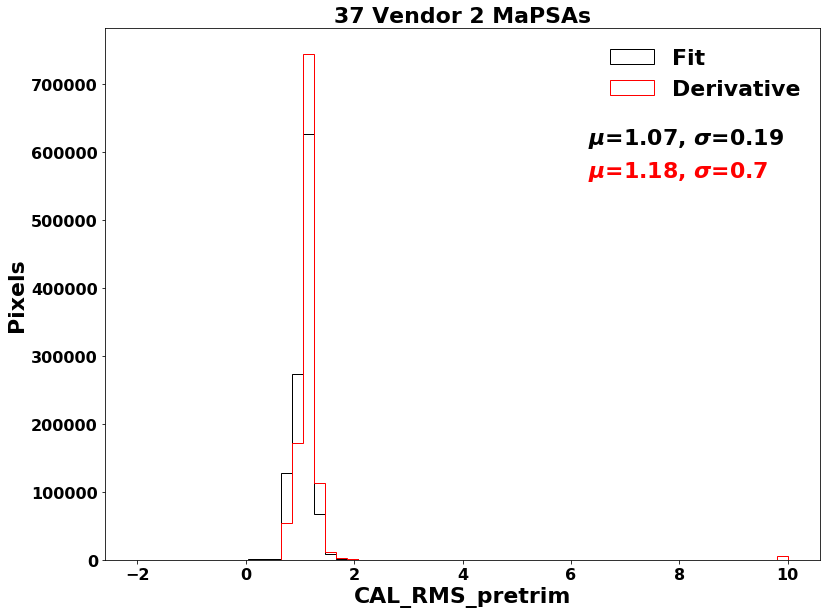

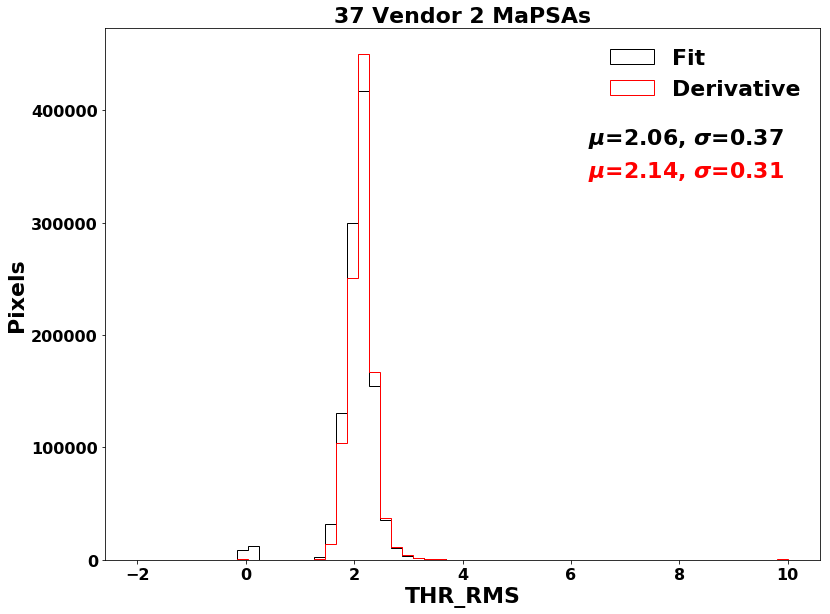

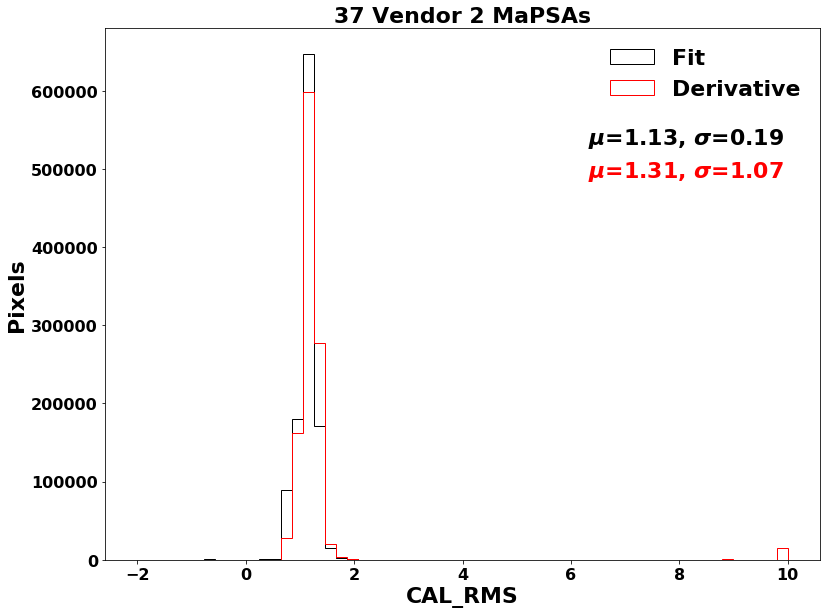

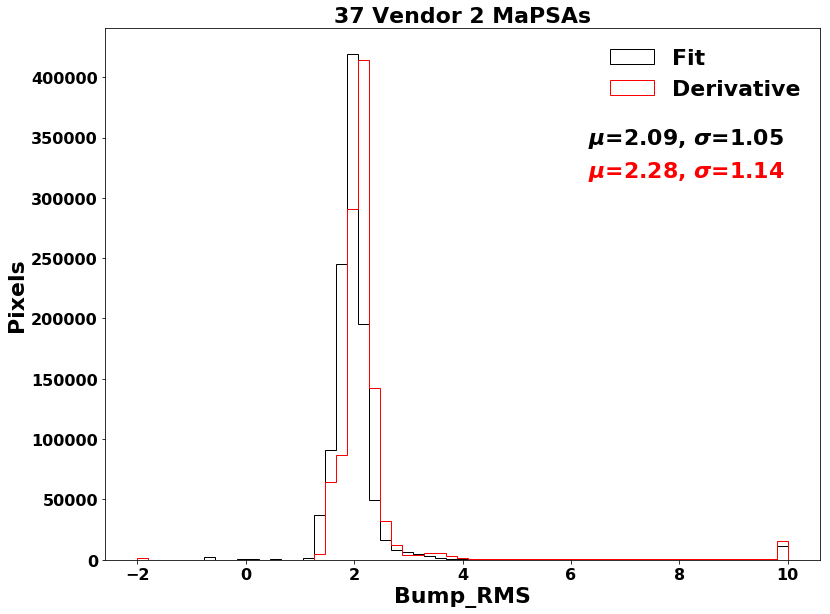

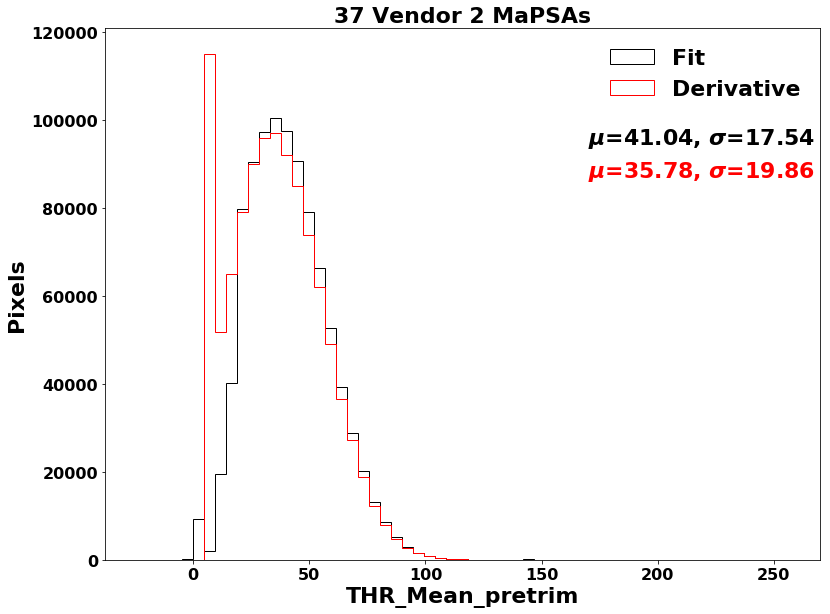

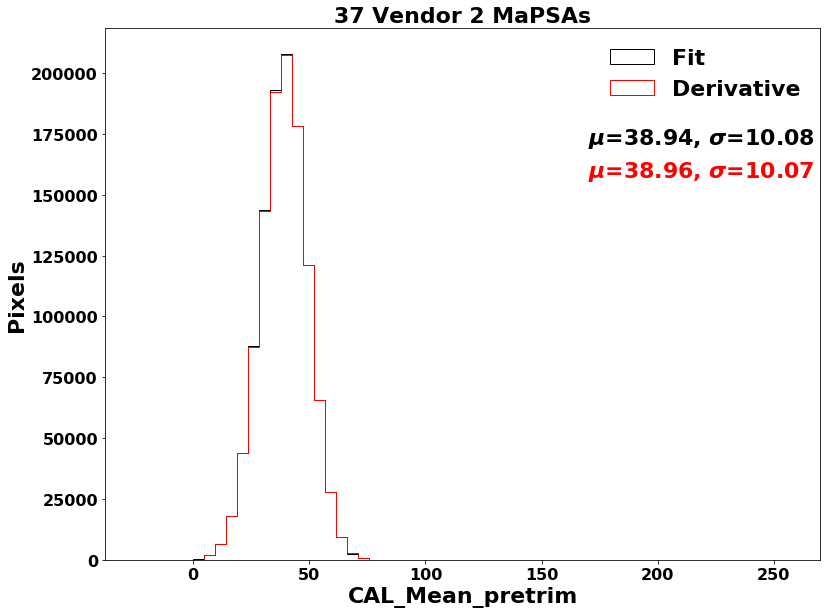

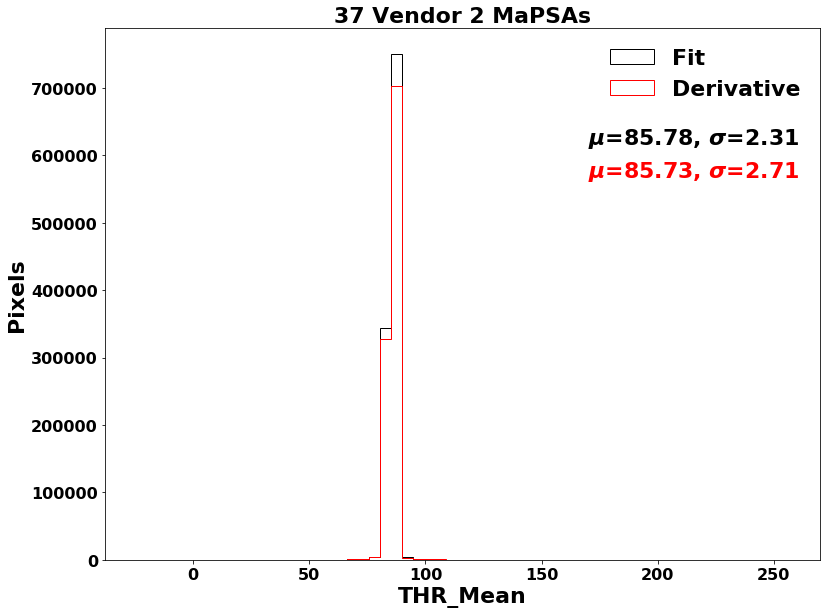

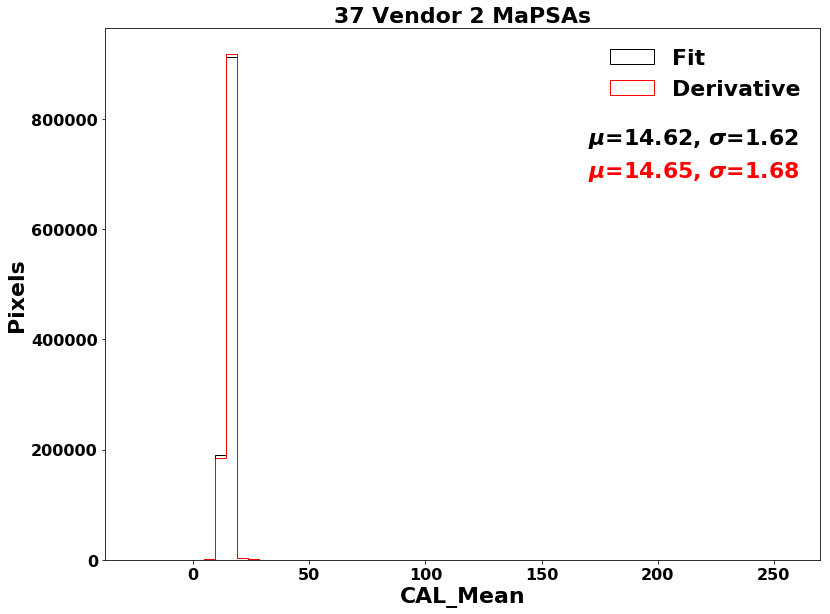

In [11]:
# noise overlay
cols = ["THR_RMS_pretrim","CAL_RMS_pretrim","THR_RMS","CAL_RMS","Bump_RMS",
       "THR_Mean_pretrim","CAL_Mean_pretrim","THR_Mean","CAL_Mean"]

for c in cols:

    bins = np.linspace(-24,256,60)
    minval = -24
    maxval = 256
    
    if "RMS" in c:
        bins = np.linspace(-2,10,60)
        minval = -2
        maxval = 10
        corrected = np.clip(allpix[c]/np.sqrt(2),minval,maxval)
    if "Mean" in c:
        corrected = np.clip(allpix[c]+1,minval,maxval)
    
    mu = np.mean(corrected)
    sigma = np.std(corrected)
    mu_der = np.mean(np.clip(allpix[c+"_DER"],minval,maxval))
    sigma_der = np.std(np.clip(allpix[c+"_DER"],minval,maxval))
    
    fig1 = plt.figure(figsize=(12,9))
    plt.hist(corrected,bins=bins,histtype='step',color='black')
    plt.hist(np.clip(allpix[c+"_DER"],minval,maxval),bins=bins,histtype='step',color='red')
    plt.xlabel(c,fontweight='bold')
    plt.ylabel("Pixels",fontweight='bold')
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    
    plt.legend(["Fit","Derivative"],frameon=False)  
    plt.figtext(.7,.75,"$\mu$="+str(round(mu,2))+", $\sigma$="+str(round(sigma,2)))
    plt.figtext(.7,.7,"$\mu$="+str(round(mu_der,2))+", $\sigma$="+str(round(sigma_der,2)),color='red')
    
    plt.tight_layout()
    plt.show()

    fig1.savefig(outdir+"/"+c+"_DER.png",bbox_inches='tight')
    fig1.savefig(outdir+"/"+c+"_DER.pdf",bbox_inches='tight')

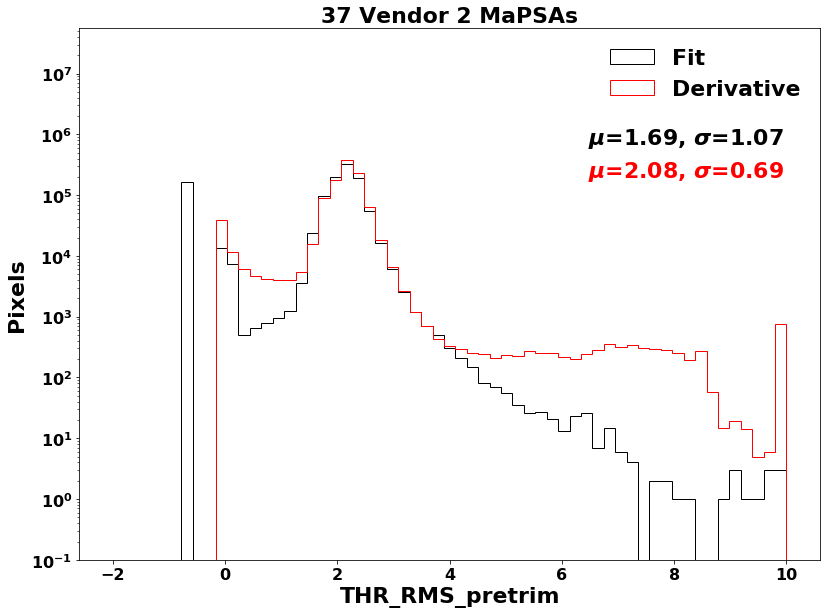

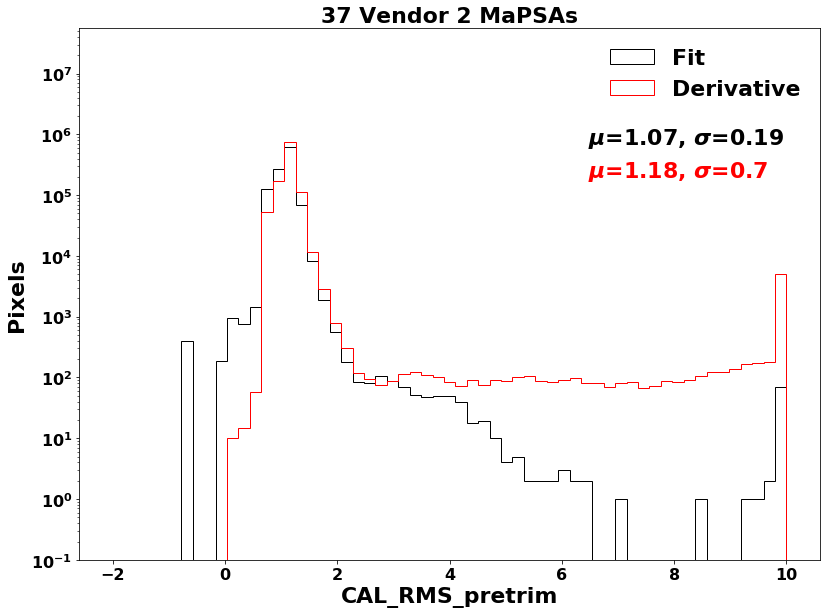

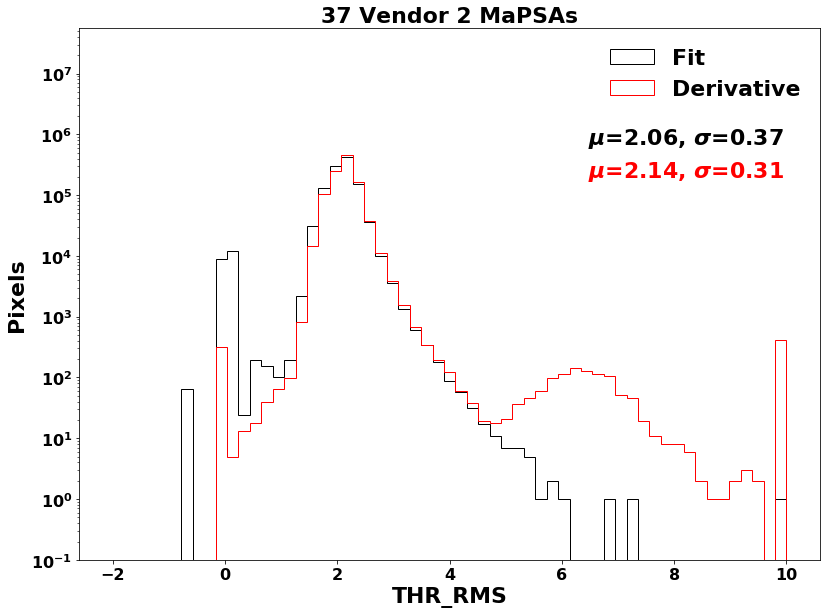

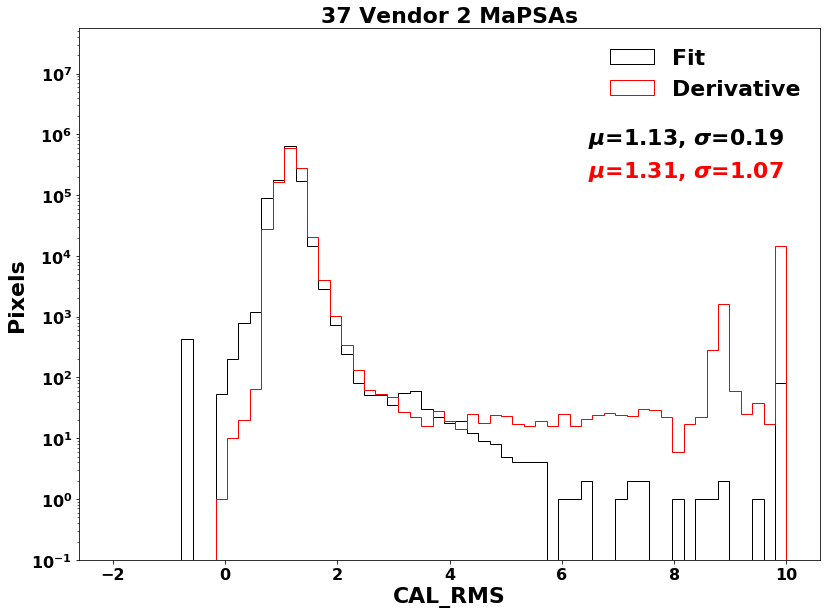

In [ ]:
# noise overlay
for c in cols:

    bins = np.linspace(-24,256,60)
    minval = -24
    maxval = 256
    
    if "RMS" in c:
        bins = np.linspace(-2,10,60)
        minval = -2
        maxval = 10
        corrected = np.clip(allpix[c]/np.sqrt(2),minval,maxval)
    if "Mean" in c:
        corrected = np.clip(allpix[c]+1,minval,maxval)
    
    mu = np.mean(corrected)
    sigma = np.std(corrected)
    mu_der = np.mean(np.clip(allpix[c+"_DER"],minval,maxval))
    sigma_der = np.std(np.clip(allpix[c+"_DER"],minval,maxval))
    
    fig1 = plt.figure(figsize=(12,9))
    plt.hist(corrected,bins=bins,histtype='step',color='black')
    plt.hist(np.clip(allpix[c+"_DER"],minval,maxval),bins=bins,histtype='step',color='red')
    plt.xlabel(c,fontweight='bold')
    plt.ylabel("Pixels",fontweight='bold')
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')

    plt.legend(["Fit","Derivative"],frameon=False)  
    plt.figtext(.7,.75,"$\mu$="+str(round(mu,2))+", $\sigma$="+str(round(sigma,2)))
    plt.figtext(.7,.7,"$\mu$="+str(round(mu_der,2))+", $\sigma$="+str(round(sigma_der,2)),color='red')

    plt.yscale('log')
    plt.ylim([0.1,logmax])
    
    plt.tight_layout()
    plt.show()

    fig1.savefig(outdir+"/"+c+"_DER_log.png",bbox_inches='tight')
    fig1.savefig(outdir+"/"+c+"_DER_log.pdf",bbox_inches='tight')